info on Cartopy
https://scitools.org.uk/cartopy/docs/latest/

build requirements to use Cartopy
https://github.com/SciTools/cartopy/blob/master/INSTALL
**** conda install -c conda-forge cartopy **** 
That should work

___

Understanding the mathematics of a satellite in orbit https://www.physicsclassroom.com/class/circles/Lesson-4/Mathematics-of-Satellite-Motion

___

In [1]:
import matplotlib.pyplot as plt
plt.ion()

# SEE ABOVE for downloading to use
import cartopy.crs as ccrs 
from orbit_predictor.sources import NoradTLESource
from orbit_predictor.locations import Location

import datetime
import pandas as pd

In [2]:
# TLE INPUT FILE WITH MANY SATELLITES
source = NoradTLESource.from_url("http://www.celestrak.com/NORAD/elements/resource.txt")
predictor = source.get_predictor("NUSAT-2")

In [3]:
#FBR = Location("Observatori Fabra", 41.4184, 2.1239, 408)
FBR = Location("CU Denver", 44.4812, 59.5829, 1590)

predicted_pass = predictor.get_next_pass(FBR)
predicted_pass

<PredictedPass NUSAT-2 over CU Denver on 2019-10-13 07:28:54.175561>

In [4]:
dates = pd.date_range(start="2019-10-09 00:00", end="2019-10-10 00:00", periods = 50)

In [5]:
latlon = pd.DataFrame( index = dates, columns = ["lat", "lon"] )

for date in dates:
    lat, lon, _ = predictor.get_position( date ).position_llh
    latlon.loc[ date ] = ( lat, lon )

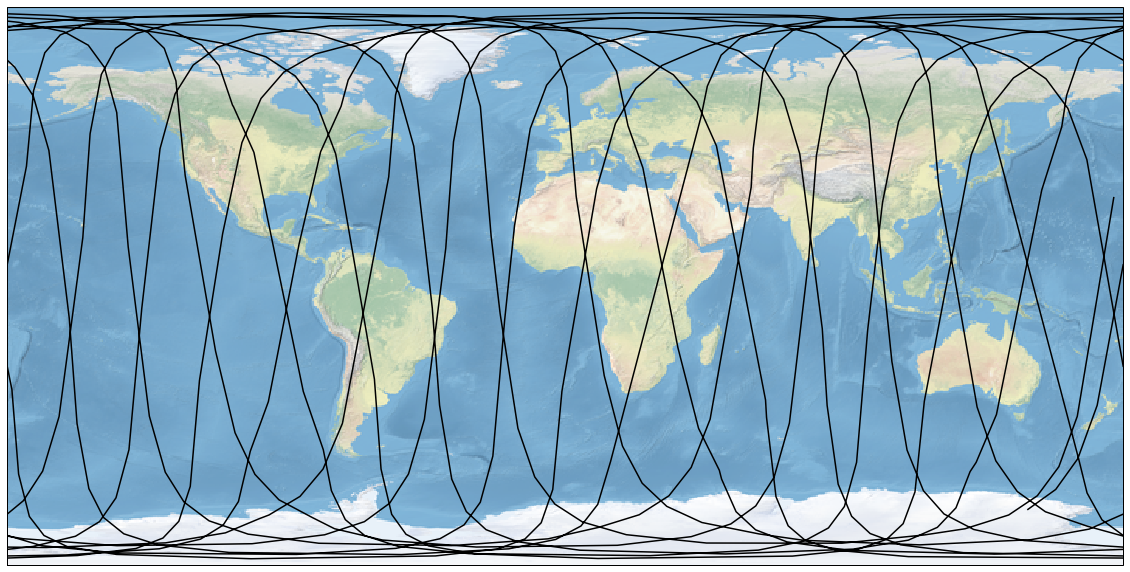

In [6]:
plt.figure( figsize = ( 20, 30 ) )
ax = plt.axes( projection = ccrs.PlateCarree() )
ax.stock_img()

plt.plot( latlon["lon"], latlon["lat"], 'k',
         transform = ccrs.Geodetic() );


In [7]:
lon

149.25971613025806

In [8]:
lat

-72.13106582614546

Moving on to modeling / plotting

In [10]:
# Need to pip install plotly
# AND     pip install astropy
# AND     pip install poliastro

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Earth
from poliastro.twobody import Orbit

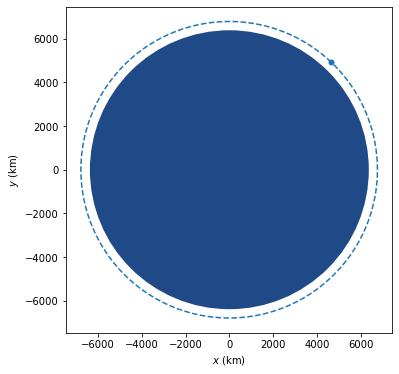

In [11]:
from poliastro.examples import iss
iss.plot()


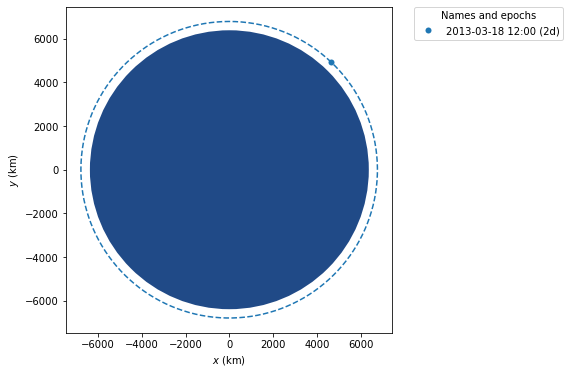

In [27]:
iss.plot("2d")

In [22]:
from poliastro.examples import iss
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode()
from plotly.graph_objs import Figure, FigureWidget
from poliastro.plotting import OrbitPlotter3D

In [23]:
fig = FigureWidget()
plotter = OrbitPlotter3D(fig)
plotter.plot(iss)

FigureWidget({
    'data': [{'line': {'color': 'rgb(31, 119, 180)', 'dash': 'dash', 'width': 5},
             …

In [25]:
iss
plotter = OrbitPlotter3D()  # A FigureWidget is created
plotter.plot(iss)

In [34]:
from astropy import time
epoch = time.Time("2015-05-09 10:43")  # UTC by default

In [36]:
from poliastro import ephem
Orbit.from_body_ephem(Earth, epoch)
#1 x 1 AU x 23.4 deg (ICRS) orbit around Sun (☉)

/opt/conda/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2015-05-09 10:44:07.185. Use Time(..., scale='tdb') instead.



1 x 1 AU x 23.4 deg (ICRS) orbit around Sun (☉) at epoch 2015-05-09 10:44:07.185 (TDB)

In [38]:
import numpy as np

import astropy.units as u
from astropy import time

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver

In [39]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [40]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [41]:
# Initial data
date_launch = time.Time("2011-11-26 15:02", scale="utc")
date_arrival = time.Time("2012-08-06 05:17", scale="utc")

In [42]:
# Solve for departure and target orbits
ss_earth = Orbit.from_body_ephem(Earth, date_launch)
ss_mars = Orbit.from_body_ephem(Mars, date_arrival)

/opt/conda/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2012-08-06 05:18:07.183. Use Time(..., scale='tdb') instead.



In [43]:
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)

In [44]:
from poliastro.plotting import OrbitPlotter3D

In [45]:
plotter = OrbitPlotter3D()
plotter.plot(ss_earth, label="Earth at launch position", color="navy")
plotter.plot(ss_mars, label="Mars at arrival position", color="red")
plotter.plot_trajectory(ss_trans.sample(max_anomaly=180*u.deg).cartesian, color="black", label="Transfer orbit")
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

/opt/conda/lib/python3.7/site-packages/poliastro/twobody/orbit.py:1163: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



In [1]:
"""Example data.
"""
from astropy import time, units as u

from poliastro.bodies import Earth, Sun
from poliastro.twobody import Orbit

iss = Orbit.from_vectors(
    Earth,
    [8.59072560e2, -4.13720368e3, 5.29556871e3] * u.km,
    [7.37289205, 2.08223573, 4.39999794e-1] * u.km / u.s,
    time.Time("2013-03-18 12:00", scale="utc"),
)
"""ISS orbit example
Taken from Plyades (c) 2012 Helge Eichhorn (MIT License)
"""

molniya = Orbit.from_classical(
    Earth, 26600 * u.km, 0.75 * u.one, 63.4 * u.deg, 0 * u.deg, 270 * u.deg, 80 * u.deg
)
"""Molniya orbit example"""

_r_a = Earth.R + 35950 * u.km
_r_p = Earth.R + 250 * u.km
_a = (_r_a + _r_p) / 2
soyuz_gto = Orbit.from_classical(
    Earth, _a, _r_a / _a - 1, 6 * u.deg, 188.5 * u.deg, 178 * u.deg, 0 * u.deg
)
"""Soyuz geostationary transfer orbit (GTO) example
Taken from Soyuz User's Manual, issue 2 revision 0
"""

churi = Orbit.from_classical(
    Sun,
    3.46250 * u.AU,
    0.64 * u.one,
    7.04 * u.deg,
    50.1350 * u.deg,
    12.8007 * u.deg,
    63.89 * u.deg,
    time.Time("2015-11-05 12:00", scale="utc"),
)
"""Comet 67P/Churyumov–Gerasimenko orbit example"""

'Comet 67P/Churyumov–Gerasimenko orbit example'